In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv('../heartdisease_.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [99]:
sum(df.isnull().sum())

0

In [100]:
df['num']=df['num'].replace({'negative':0,'positive':1})
df=df.replace({'<null>':np.nan})
df.ca=df.ca.replace({np.nan:'0'})
df.thal=df.thal.replace({np.nan:'3.0'})

In [101]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,1
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,1


In [102]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [104]:
X=df.drop(columns=['num'],axis=1)
y=df['num']

In [105]:
def model_metrics(X,y,tip):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=286, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    
    egt_matris = confusion_matrix(y_eğitim, tahmin_eğitim)
    test_matris = confusion_matrix(y_test, tahmin_test)

    tablo=pd.DataFrame(columns={"Dogruluk (Egt)","Hassasiyet (Egt)","Duyarlılık (Egt)", "F1 (Egt)",
                         "Dogruluk (Tst)", "Hassasiyet (Tst)", "Duyarlılık (Tst)", "F1 (Tst)"})
    
    egt_dogru=(egt_matris[0][0]+egt_matris[1][1])/(egt_matris[0][0]+egt_matris[0][1]+egt_matris[1][0]+egt_matris[1][1])
    egt_hassas=egt_matris[1][1]/(egt_matris[1][1]+egt_matris[0][1])
    egt_duyar=egt_matris[1][1]/(egt_matris[1][1]+egt_matris[1][0])
    egt_f1=(2*egt_hassas*egt_duyar)/(egt_hassas+egt_duyar)
    
    test_dogru=(test_matris[0][0]+test_matris[1][1])/(test_matris[0][0]+test_matris[0][1]+test_matris[1][0]+test_matris[1][1])
    test_hassas=test_matris[1][1]/(test_matris[1][1]+test_matris[0][1])
    test_duyar=test_matris[1][1]/(test_matris[1][1]+test_matris[1][0])
    test_f1=(2*test_hassas*test_duyar)/(test_hassas+test_duyar)
    
    row = pd.Series({"Dogruluk (Egt)":egt_dogru, 
                    "Hassasiyet (Egt)":egt_hassas, 
                    "Duyarlılık (Egt)":egt_duyar, 
                    "Dogruluk (Tst)":test_dogru, 
                    "Hassasiyet (Tst)":test_hassas, 
                    "Duyarlılık (Tst)":test_duyar, 
                    "F1 (Tst)":test_f1,"F1 (Egt)":egt_f1,},
                    name=tip)
   
    tablo=tablo.append(row)
    
    return  tablo

Kalp krizi riski var : %7.34
Kalp krizi riski yok : %92.66


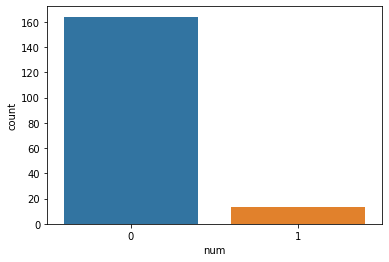

In [106]:
sns.countplot(df.num)
print("Kalp krizi riski var : %{:.2f}".format(sum(df.num)/len(df.num)*100))
print("Kalp krizi riski yok : %{:.2f}".format((len(df.num)-sum(df.num))/len(df.num)*100))

In [107]:
model_metrics(X,y,tip='Dengeli Olmayan')

,F1 (Egt),Dogruluk (Egt),Hassasiyet (Tst),Dogruluk (Tst),Duyarlılık (Tst),Duyarlılık (Egt),Hassasiyet (Egt),F1 (Tst)
Dengeli Olmayan,0.777778,0.971631,0.75,0.972222,1.0,0.7,0.875,0.857143


### 1. Örneklem Arttırma

In [108]:
risk_var=df[df.num==1]
risk_yok=df[df.num==0]
risk_arttirilmis=resample(risk_var,replace = True,
                                n_samples = len(risk_yok),
                                random_state = 286)
artırılmıs_df = pd.concat([risk_yok, risk_arttirilmis])
artırılmıs_df.num.value_counts()

1    164
0    164
Name: num, dtype: int64

In [109]:
X=artırılmıs_df.drop('num',axis=1)
y=artırılmıs_df.num
model_metrics(X,y,tip='Arttırılmış')

,F1 (Egt),Dogruluk (Egt),Hassasiyet (Tst),Dogruluk (Tst),Duyarlılık (Tst),Duyarlılık (Egt),Hassasiyet (Egt),F1 (Tst)
Arttırılmış,0.973978,0.973282,0.916667,0.954545,1.0,1.0,0.949275,0.956522


### 2. SMOTE

In [110]:
X=df.drop('num',axis=1)
y=df.num
sm = SMOTE(random_state=286)
X_smote, y_smote = sm.fit_sample(X, y)
model_metrics(X_smote,y_smote,tip='SMOTE')

,F1 (Egt),Dogruluk (Egt),Hassasiyet (Tst),Dogruluk (Tst),Duyarlılık (Tst),Duyarlılık (Egt),Hassasiyet (Egt),F1 (Tst)
SMOTE,0.973783,0.973282,0.916667,0.954545,1.0,0.992366,0.955882,0.956522


### 3. ADASYN

In [111]:
X=df.drop('num',axis=1)
y=df.num
ad = ADASYN(random_state=286)
X_adasyn, y_adasyn = ad.fit_sample(X, y)
model_metrics(X_adasyn,y_adasyn,tip='ADASYN')

,F1 (Egt),Dogruluk (Egt),Hassasiyet (Tst),Dogruluk (Tst),Duyarlılık (Tst),Duyarlılık (Egt),Hassasiyet (Egt),F1 (Tst)
ADASYN,0.977778,0.977186,0.916667,0.954545,1.0,1.0,0.956522,0.956522


SMOTE ve ADASYN algoritmalari oldukça iyi sonuçlar vermiştir.